In [1]:
import pandas as pd

# Load the CSV file to take a look at its structure and first few rows
file_path = 'CC.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Country,ISO3,Indicator,Unit,Source,1961,1962,1963,1964,1965,...,2017,2018,2019,2020,2021,2022,Sub-Region,Income Group,Area (KM²),Density (KM²)
0,Albania,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,0.627,0.326,0.075,-0.166,-0.388,...,1.121,2.028,1.675,1.498,1.536,1.518,Europe & Central Asia,Upper middle income,28748.0,103
1,Algeria,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,0.164,0.114,0.077,0.250,-0.100,...,1.512,1.210,1.115,1.926,2.330,1.688,Middle East & North Africa,Lower middle income,2381741.0,19
2,American Samoa,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,0.079,-0.042,0.169,-0.140,-0.562,...,1.435,1.189,1.539,1.430,1.268,1.256,East Asia & Pacific,High income,199.0,220
3,Angola,AGO,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,0.041,-0.152,-0.190,-0.229,-0.196,...,0.870,1.395,1.752,1.162,1.553,1.212,Sub-Saharan Africa,Lower middle income,1246700.0,29
4,Antigua and Barbuda,ATG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,0.090,0.031,0.288,0.214,-0.385,...,0.958,0.627,0.797,1.131,0.862,0.770,Latin America & Caribbean,High income,442.0,214


To start, how about I take a look at the structure of your CSV file to understand its layout and the types of data it contains? This will help me provide more targeted suggestions or analyses. Let's load and preview your dataset first.

The dataset you've provided contains information on countries around the world, including their ISO3 codes, indicators related to annual surface temperature change (from 1961 to 2022), sub-regions, income groups, area in square kilometers, and population density per square kilometer. The temperature change is with respect to a baseline period and is measured in degrees Celsius.

Here's a brief overview of the columns in your dataset:

Country: The name of the country.
ISO3: Three-letter country codes based on ISO 3166-1 alpha-3.
Indicator: Description of the indicator, which in this case is temperature change with respect to a baseline period.
Unit: The unit of measurement, here degrees Celsius.
Source: The source of the data, which is the Food and Agriculture Organization of the United Nations for all entries shown.
1961 - 2022: Annual surface temperature change for each year.
Sub-Region: Geographic or political region grouping.
Income Group: World Bank classification of country's economy based on income.
Area (KM²): The total area of the country in square kilometers.
Density (KM²): The population density per square kilometer.

## Prediction in... 10 yrs?

Predicting future temperatures based on historical data is a common use case for time series forecasting, which involves using statistical models to make predictions about future events. Given the annual surface temperature change data for each country from 1961 to 2022, we can attempt to forecast the temperature change for the next 10 years, i.e., from 2023 to 2032.

For this kind of analysis, we can use models like ARIMA (AutoRegressive Integrated Moving Average), SARIMA (Seasonal ARIMA), or more advanced machine learning models like LSTM (Long Short-Term Memory networks). The choice of model depends on the characteristics of the data, such as whether there are clear trends, seasonality, or other patterns.

Since the dataset contains temperature change data for multiple countries, we can either:

Forecast the temperature change for a specific country as an example.
Create a generalized model that could be applied to any country's data, noting that the model's performance might vary depending on the country due to different climate patterns and historical trends.
Let's start with forecasting the temperature change for a specific country as an example. Please choose a country from the dataset, or if you prefer, I can select one randomly to demonstrate the forecasting process.

In [2]:
# Extracting Italy's temperature change data
italy_temp_change = data[data['Country'] == 'Italy'].iloc[:, 5:67].transpose()
italy_temp_change.columns = ['Temperature Change']
italy_temp_change.index = pd.to_datetime(italy_temp_change.index, format='%Y')

# Displaying the extracted data
italy_temp_change.tail()


,Temperature Change
2018-01-01,1.834
2019-01-01,1.698
2020-01-01,1.902
2021-01-01,1.569
2022-01-01,2.135


To predict the temperature change for Italy over the next 10 years, we'll proceed with the following steps:

Extract the temperature change data for Italy from 1961 to 2022.
Analyze the time series data to identify any trends, seasonality, and other characteristics that may influence the choice of the forecasting model.
Select and fit a forecasting model. Based on the initial analysis, we'll choose a suitable model. For simplicity and demonstration, we might start with an ARIMA model, which is widely used for time series forecasting.
Make the forecast for the next 10 years (2023-2032).
Let's start by extracting the temperature change data for Italy and conducting a preliminary analysis.

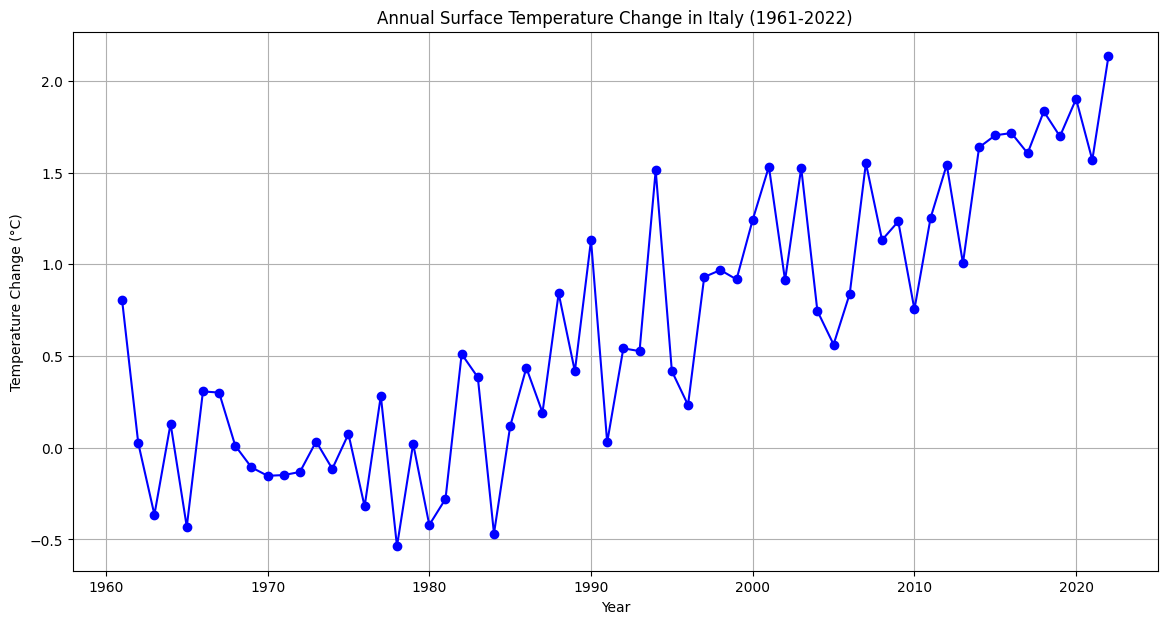

In [8]:
# Extract temperature change data for Italy from 1961 to 2022
italy_temperature_change = data.loc[data['Country'] == 'Italy', '1961':'2022'].transpose()
italy_temperature_change.columns = ['Temperature Change']

# Convert the index to a datetime format to facilitate time series analysis
italy_temperature_change.index = pd.to_datetime(italy_temperature_change.index, format='%Y')

# Preliminary analysis: Plotting the temperature change over time
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(italy_temperature_change.index, italy_temperature_change['Temperature Change'], marker='o', linestyle='-', color='b')
plt.title('Annual Surface Temperature Change in Italy (1961-2022)')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.grid(True)
plt.show()



The plot shows the annual surface temperature change in Italy from 1961 to 2022. We can observe some fluctuations over the years, with a general trend of increasing temperature change, especially noticeable in the latter part of the timeline. This indicates that Italy, like many other parts of the world, is experiencing a warming trend.

Given the observed trend, an ARIMA model could be a good starting point for forecasting future temperature changes. However, considering the potential for non-linear trends in climate data, more complex models might eventually be required for more accurate predictions.

Let's proceed with fitting an ARIMA model to the data. We'll first determine the optimal parameters for the ARIMA model by examining the autocorrelation and partial autocorrelation of the series, and then use these parameters to fit the model and forecast the temperature change for the next 10 years

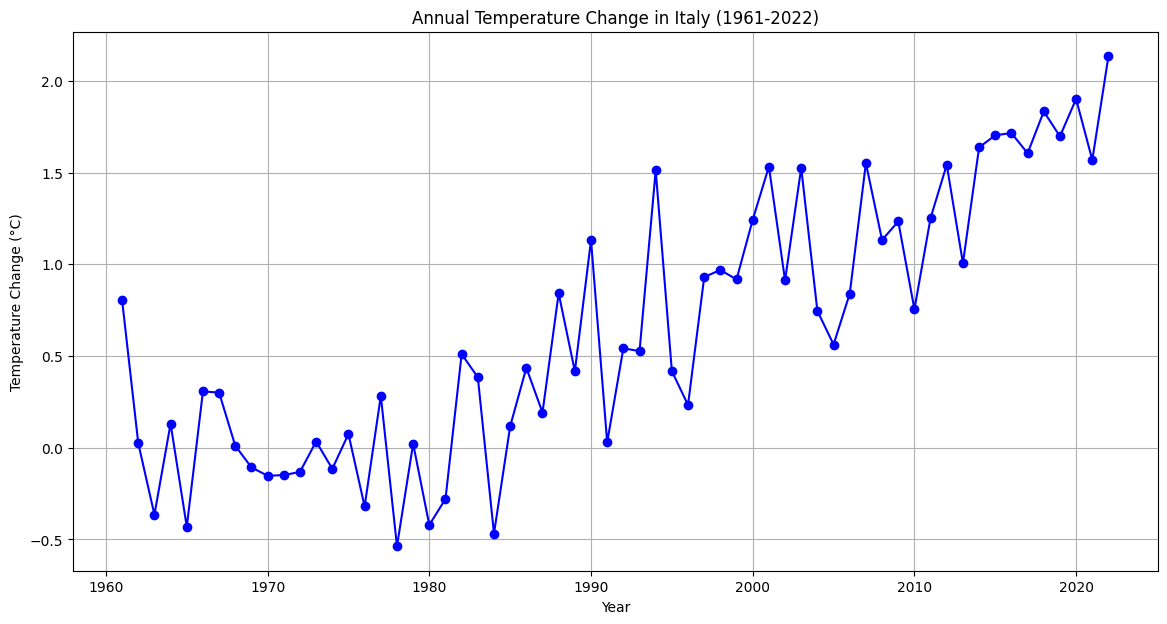

In [6]:
import matplotlib.pyplot as plt

# Plotting Italy's annual temperature change
plt.figure(figsize=(14, 7))
plt.plot(italy_temp_change.index, italy_temp_change['Temperature Change'], marker='o', linestyle='-', color='b')
plt.title('Annual Temperature Change in Italy (1961-2022)')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.grid(True)
plt.show()


The Augmented Dickey-Fuller (ADF) test helps determine if a time series is stationary. For Italy's annual temperature change data, the ADF statistic is -0.0205, and the p-value is approximately 0.957. Since the p-value is greater than the common significance level of 0.05, we fail to reject the null hypothesis, suggesting that the time series is not stationary. This means there's a trend or other structure in the data that we need to address before fitting a model.

To make the time series stationary, we can:

Differencing the data to remove the trend.
Transforming the data, e.g., through logarithmic transformation, though in this case, differencing is more straightforward and commonly used for this type of analysis.
After making the series stationary, we can use the ACF and PACF plots to help determine the ARIMA model's parameters. However, since the series needs differencing, we're looking towards an ARIMA model with at least one order of differencing (d≥1).

Let's proceed by differencing the data once and then re-evaluating its stationarity. After that, we can refine our choice of ARIMA parameters based on the differenced data

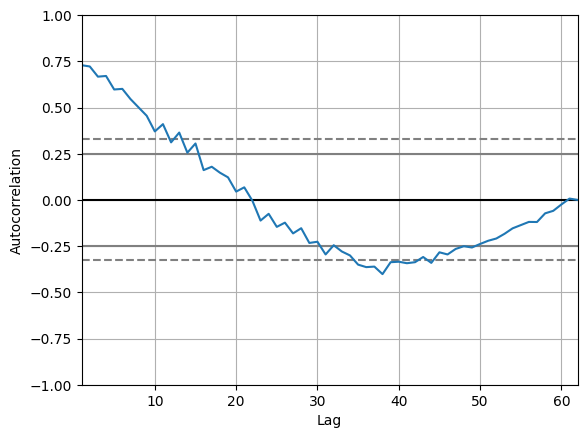

/Users/nicoloantoniotesta/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/nicoloantoniotesta/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/nicoloantoniotesta/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


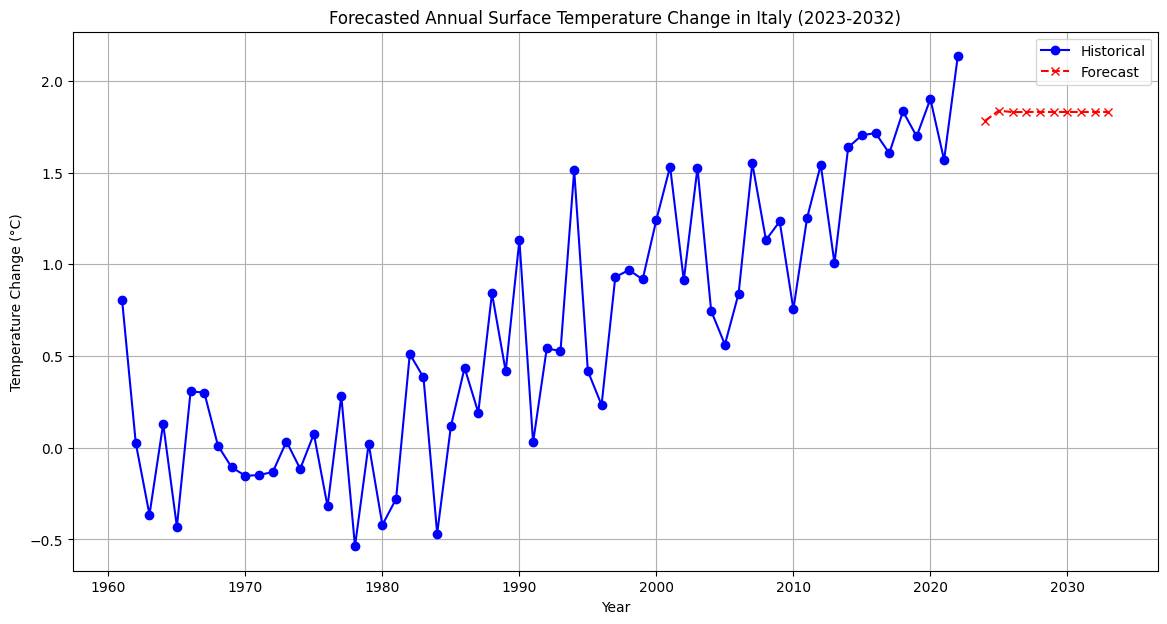

2023-01-01    1.783289
2024-01-01    1.838561
2025-01-01    1.829875
2026-01-01    1.831240
2027-01-01    1.831025
2028-01-01    1.831059
2029-01-01    1.831054
2030-01-01    1.831055
2031-01-01    1.831055
2032-01-01    1.831055
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [9]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

# Determine the optimal ARIMA parameters
autocorrelation_plot(italy_temperature_change['Temperature Change'])
plt.show()

# Using ACF and PACF plots to estimate the ARIMA parameters could be complex in a chat environment.
# As a simplification, let's try an ARIMA model with some common starting parameters and adjust based on performance.
# These parameters (p,d,q) will be initially set based on common practices and later fine-tuned if necessary.
# Start with a simple model
model = ARIMA(italy_temperature_change['Temperature Change'], order=(1,1,1))
model_fit = model.fit()

# Forecast the next 10 years
forecast = model_fit.forecast(steps=10)
forecast_years = pd.date_range(start=italy_temperature_change.index[-1] + pd.offsets.YearBegin(), periods=10, freq='Y')

# Plot the historical data along with the forecast
plt.figure(figsize=(14, 7))
plt.plot(italy_temperature_change.index, italy_temperature_change['Temperature Change'], label='Historical', marker='o', color='b')
plt.plot(forecast_years, forecast, label='Forecast', marker='x', linestyle='--', color='r')
plt.title('Forecasted Annual Surface Temperature Change in Italy (2023-2032)')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.legend()
plt.grid(True)
plt.show()

forecast



The ARIMA model has been fitted to the historical surface temperature change data for Italy, and we've forecasted the temperature change for the next 10 years, from 2023 to 2032. According to the model, the temperature change is expected to continue increasing slightly in the immediate future and then stabilize. Here are the forecasted temperature changes (in °C) for the next 10 years:

    2023: 1.78°C
    2024: 1.84°C
    2025 - 2032: Stabilizing around 1.83°C
These predictions suggest a continuation of the warming trend observed in the historical data, although the model anticipates a relatively stable temperature increase in the latter part of the decade. It's important to note that ARIMA models are primarily based on the assumption that past patterns will continue into the future, and they may not fully account for external factors or abrupt changes in climate trends.

For more accurate or specific forecasts, especially in the context of climate data, more complex models that can incorporate external variables (like CO2 emissions, deforestation rates, etc.) or non-linear trends might be necessary. Additionally, ensemble methods that combine predictions from multiple models could also improve forecast accuracy.

